## KNN Regressor to determine price differences based on the average prices of nearest neighbors.





Cross-Validation R2 Scores: [0.28148176 0.24524505 0.27017217 0.25903983 0.24161331]
Mean CV R2 Score: 0.2595104224186254, Std CV R2 Score: 0.014969578293531214
Results for KNN Regressor:
{'Model': 'KNN Regressor', 'Train R2': 0.3408221114298613, 'Train RMSE': 40.930575515313066, 'Train MSE': 1675.3120120147457, 'Train MAE': 30.59845036843765, 'Test R2': 0.26386082211788675, 'Test RMSE': 41.88845940135301, 'Test MSE': 1754.6430310187993, 'Test MAE': 31.2696817256504}


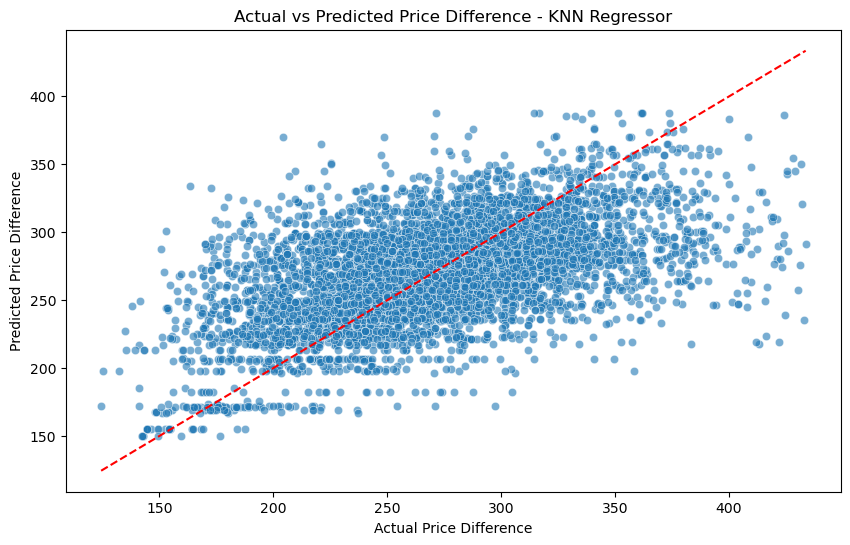

In [4]:
# knn_with_cv.py
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the KNN Regressor model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'KNN Regressor',
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for KNN Regressor:")
print(results)



# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


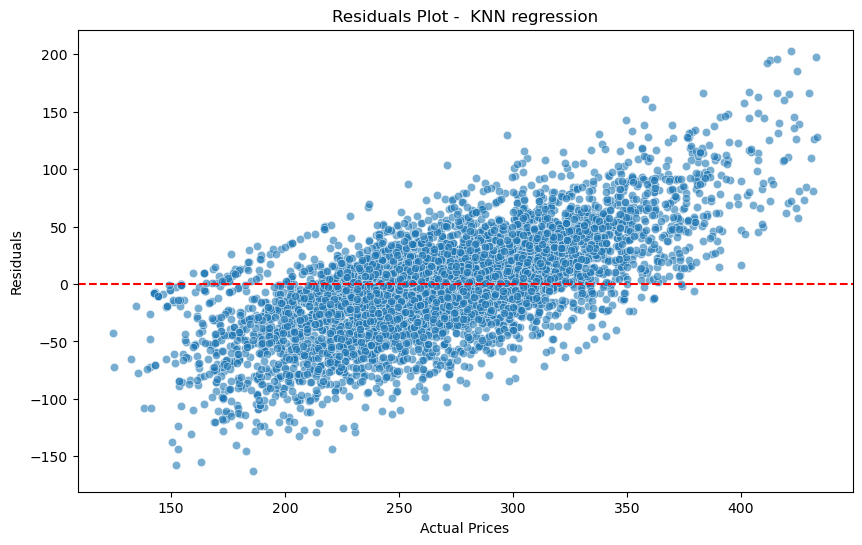

In [3]:


#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  KNN regression')
plt.show()


## The residuals plot shows that the residuals are centered around zero, indicating no obvious overfitting. However, there is an increasing spread in residuals as actual values increase, suggesting issues with heteroscedasticity. This pattern indicates that the KNN model struggles with predicting higher values accurately.






